In [ ]:
!pip install -q keras

# Imports

In [ ]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

In [ ]:
#Connect with google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load data and Preprocessing

In [ ]:
#Train Generator
train_data = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=10,
        horizontal_flip=True)
train_generator = train_data.flow_from_directory(
        '/content/drive/My Drive/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE), #image scale
        class_mode="sparse") #for class names

Found 3352 images belonging to 7 classes.


In [ ]:
#Class names
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [ ]:
#Test Generator
test_data = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=10,
        horizontal_flip=True)
test_generator = test_data.flow_from_directory(
        '/content/drive/My Drive/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 813 images belonging to 7 classes.


In [ ]:
#Building the model structure
model = Sequential([
    Convolution2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'), #Default padding - without frame
    MaxPooling2D(pool_size=(2, 2)),
    Convolution2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.40),
    Dense(units=32, activation='relu'),
    Dense(units=7, activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [ ]:
#Compiling a neural network
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [ ]:
#Neural Network Training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30)

Epoch 1/30
105/105 [==============================] - 34s 294ms/step - loss: 1.8494 - accuracy: 0.2870 - val_loss: 1.7558 - val_accuracy: 0.3395
Epoch 2/30
105/105 [==============================] - 30s 287ms/step - loss: 1.6750 - accuracy: 0.3783 - val_loss: 1.6085 - val_accuracy: 0.4231
Epoch 3/30
105/105 [==============================] - 31s 292ms/step - loss: 1.5496 - accuracy: 0.4365 - val_loss: 1.5037 - val_accuracy: 0.4637
Epoch 4/30
105/105 [==============================] - 31s 295ms/step - loss: 1.4080 - accuracy: 0.4946 - val_loss: 1.3591 - val_accuracy: 0.5043
Epoch 5/30
105/105 [==============================] - 30s 287ms/step - loss: 1.2714 - accuracy: 0.5498 - val_loss: 1.3203 - val_accuracy: 0.5424
Epoch 6/30
105/105 [==============================] - 31s 291ms/step - loss: 1.1726 - accuracy: 0.5826 - val_loss: 1.1510 - val_accuracy: 0.6162
Epoch 7/30
105/105 [==============================] - 30s 291ms/step - loss: 1.0558 - accuracy: 0.6360 - val_loss: 1.1195 - val_ac

In [ ]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 6s 243ms/step - loss: 0.8937 - accuracy: 0.7478


In [ ]:
#List of result for train and test data
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

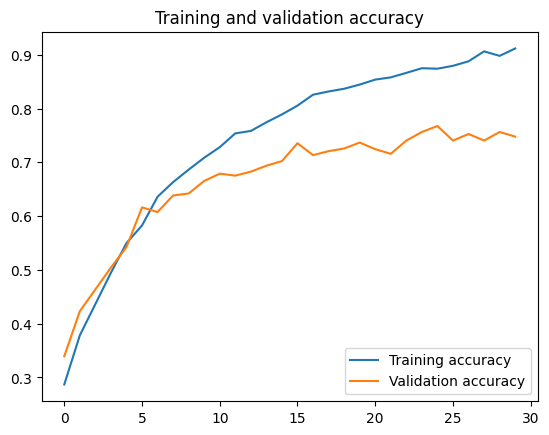

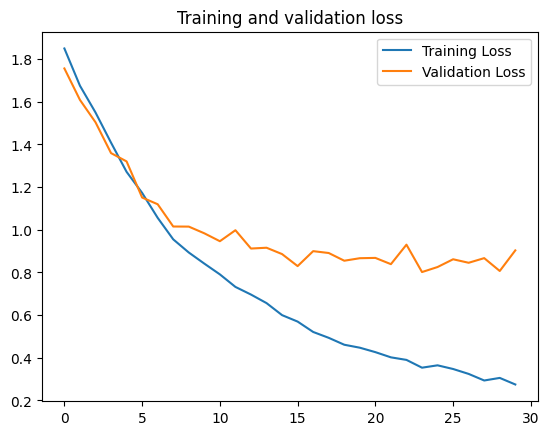

In [ ]:
#Plot training and validation accuracy per epoch
epochs=range(len(acc))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Function for predict classes
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 18ms/step


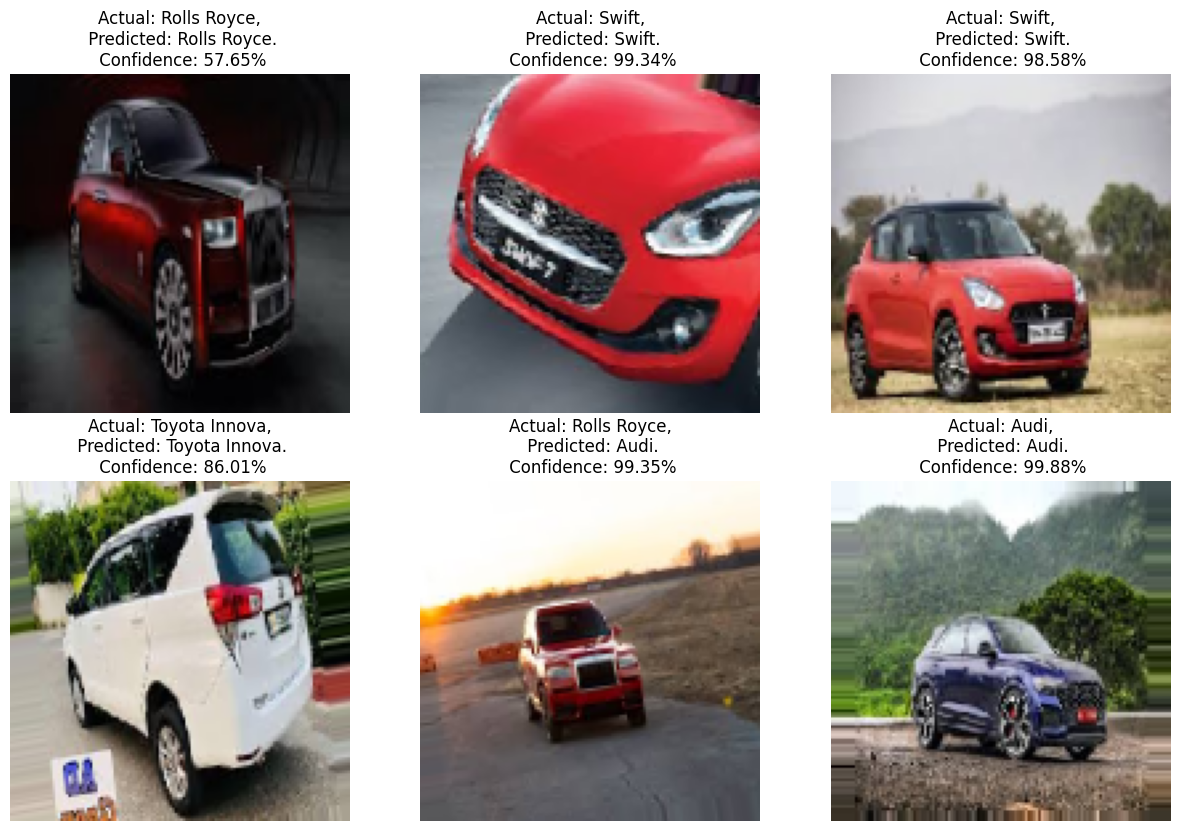

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break

# VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
VGG16_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
VGG16_model.trainable = False
VGG16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
#Building the model structure
model = Sequential([
    VGG16_model,
    Flatten(),
    Dense(units=4096,activation="relu"),
    Dropout(0.40),
    Dense(units=4096,activation="relu"),
    Dropout(0.20),
    Dense(units=7, activation="softmax")])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 4096)              33558528  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 7)                 2

In [ ]:
#Compiling a neural network
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [ ]:
#Neural Network Training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30)

Epoch 1/30
105/105 [==============================] - 1084s 10s/step - loss: 2.2279 - accuracy: 0.4048 - val_loss: 1.1587 - val_accuracy: 0.6064
Epoch 2/30
105/105 [==============================] - 34s 325ms/step - loss: 1.2138 - accuracy: 0.5701 - val_loss: 1.0064 - val_accuracy: 0.6470
Epoch 3/30
105/105 [==============================] - 34s 325ms/step - loss: 1.0582 - accuracy: 0.6122 - val_loss: 0.8567 - val_accuracy: 0.6876
Epoch 4/30
105/105 [==============================] - 33s 311ms/step - loss: 0.9692 - accuracy: 0.6584 - val_loss: 0.8173 - val_accuracy: 0.7257
Epoch 5/30
105/105 [==============================] - 37s 355ms/step - loss: 0.9407 - accuracy: 0.6566 - val_loss: 0.7517 - val_accuracy: 0.7306
Epoch 6/30
105/105 [==============================] - 33s 314ms/step - loss: 0.9174 - accuracy: 0.6709 - val_loss: 0.7937 - val_accuracy: 0.7109
Epoch 7/30
105/105 [==============================] - 34s 325ms/step - loss: 0.8549 - accuracy: 0.6891 - val_loss: 0.6886 - val_ac

In [ ]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 6s 227ms/step - loss: 0.5836 - accuracy: 0.8081


In [ ]:
#List of result for train and test data
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

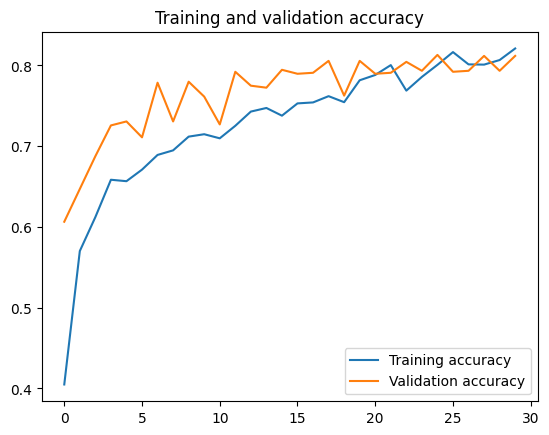

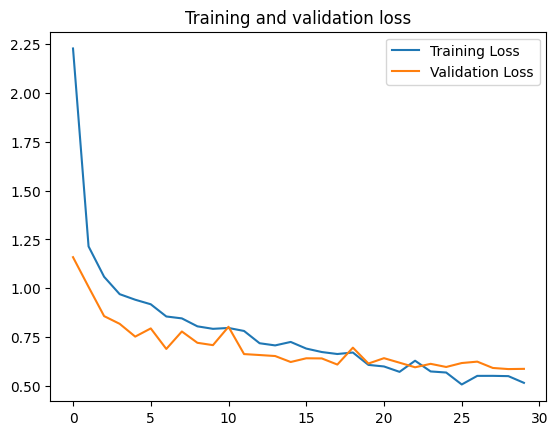

In [ ]:
#Plot training and validation accuracy per epoch
epochs=range(len(acc))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# VGG19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
VGG19_model = VGG19(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
VGG19_model.trainable = False
VGG19_model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
#Building the model structure
model = Sequential([
    VGG19_model,
    Flatten(),
    Dense(units=4096,activation="relu"),
    Dropout(0.40),
    Dense(units=4096,activation="relu"),
    Dropout(0.20),
    Dense(units=7, activation="softmax")])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 4096)              33558528  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 7)                 2

In [ ]:
#Compiling a neural network
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [ ]:
#Neural Network Training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30)

Epoch 1/30
105/105 [==============================] - 1087s 10s/step - loss: 2.5425 - accuracy: 0.3538 - val_loss: 1.4065 - val_accuracy: 0.5018
Epoch 2/30
105/105 [==============================] - 37s 352ms/step - loss: 1.3374 - accuracy: 0.5069 - val_loss: 1.1539 - val_accuracy: 0.6089
Epoch 3/30
105/105 [==============================] - 33s 314ms/step - loss: 1.2602 - accuracy: 0.5403 - val_loss: 1.0813 - val_accuracy: 0.6236
Epoch 4/30
105/105 [==============================] - 33s 317ms/step - loss: 1.1904 - accuracy: 0.5680 - val_loss: 1.0972 - val_accuracy: 0.6273
Epoch 5/30
105/105 [==============================] - 33s 310ms/step - loss: 1.1551 - accuracy: 0.5791 - val_loss: 0.9971 - val_accuracy: 0.6458
Epoch 6/30
105/105 [==============================] - 32s 302ms/step - loss: 1.0935 - accuracy: 0.6155 - val_loss: 0.9422 - val_accuracy: 0.6962
Epoch 7/30
105/105 [==============================] - 33s 313ms/step - loss: 1.0102 - accuracy: 0.6393 - val_loss: 0.9959 - val_ac

In [ ]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 7s 259ms/step - loss: 0.7403 - accuracy: 0.7503


In [ ]:
#List of result for train and test data
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

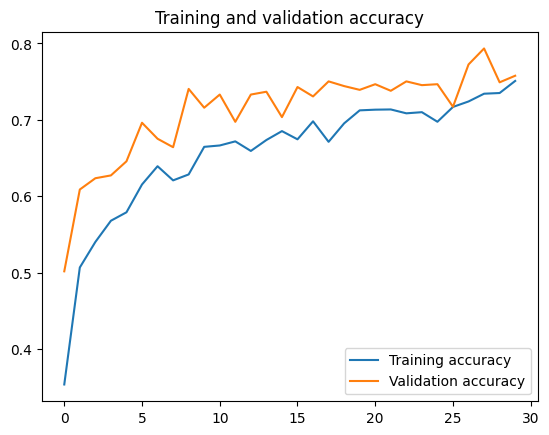

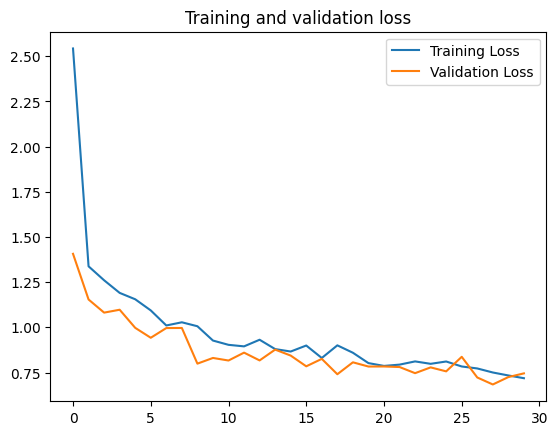

In [ ]:
#Plot training and validation accuracy per epoch
epochs=range(len(acc))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# AlexNet

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
model = Sequential([
    Convolution2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Convolution2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Convolution2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Convolution2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.4),
    Dense(4096, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 30, 30, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 256)       1024      
 chNormalization)                                                
                                                      

In [ ]:
#Compiling a neural network
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [ ]:
#Neural Network Training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30)

Epoch 1/30
105/105 [==============================] - 40s 322ms/step - loss: 2.6494 - accuracy: 0.2950 - val_loss: 1.8650 - val_accuracy: 0.2694
Epoch 2/30
105/105 [==============================] - 34s 329ms/step - loss: 1.6610 - accuracy: 0.3768 - val_loss: 1.8544 - val_accuracy: 0.2841
Epoch 3/30
105/105 [==============================] - 31s 296ms/step - loss: 1.5480 - accuracy: 0.4376 - val_loss: 2.1553 - val_accuracy: 0.3050
Epoch 4/30
105/105 [==============================] - 30s 289ms/step - loss: 1.5009 - accuracy: 0.4582 - val_loss: 1.5259 - val_accuracy: 0.4330
Epoch 5/30
105/105 [==============================] - 30s 286ms/step - loss: 1.4173 - accuracy: 0.4851 - val_loss: 1.7904 - val_accuracy: 0.3690
Epoch 6/30
105/105 [==============================] - 35s 333ms/step - loss: 1.3232 - accuracy: 0.5280 - val_loss: 1.4685 - val_accuracy: 0.5006
Epoch 7/30
105/105 [==============================] - 29s 281ms/step - loss: 1.2589 - accuracy: 0.5513 - val_loss: 1.5943 - val_ac

In [ ]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 6s 228ms/step - loss: 0.9424 - accuracy: 0.7122


In [ ]:
#List of result for train and test data
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

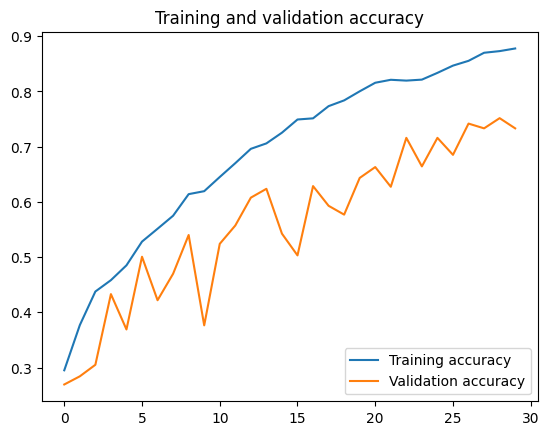

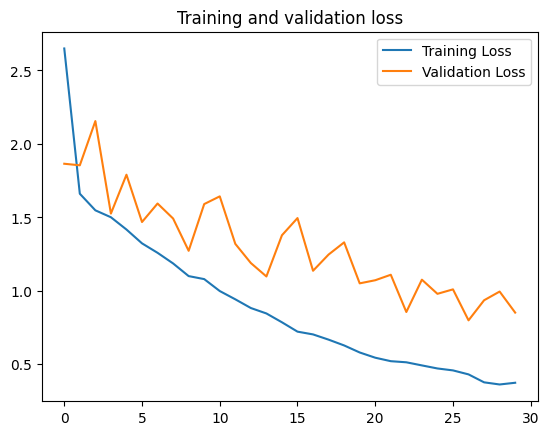

In [ ]:
#Plot training and validation accuracy per epoch
epochs=range(len(acc))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()